In [8]:
import sys
sys.path.append('/Users/iskandre/tensorflow-models/models/research')
sys.path.append('/Users/iskandre/tensorflow-models/models')
from object_detection.utils import config_util
from object_detection.builders import model_builder
from object_detection import inputs

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import pandas as pd
KEYPOINT_DEF = (
    "https://github.com/benjiebob/StanfordExtra/raw/master/keypoint_definitions.csv"
)
keypoint_def = pd.read_csv(KEYPOINT_DEF)
keypoint_def.head(15)

,Index,Name,Hex colour,Stanford,Animal-pose,(name in animal pose)
0,0,Left front leg: paw,d82400,y,y,L_F_Paw
1,1,Left front leg: middle joint,d82400,y,y,L_F_Knee
2,2,Left front leg: top,d82400,y,y,L_F_Elbow
3,3,Left rear leg: paw,fcfc00,y,y,L_B_Paw
4,4,Left rear leg: middle joint,fcfc00,y,y,L_B_Knee
5,5,Left rear leg: top,fcfc00,y,y,L_B_Elbow
6,6,Right front leg: paw,48b455,y,y,R_F_Paw
7,7,Right front leg: middle joint,48b455,y,y,R_F_Knee
8,8,Right front leg: top,48b455,y,y,R_F_Elbow
9,9,Right rear leg: paw,0090aa,y,y,R_B_Paw


In [14]:
pipeline_config_path = '/Users/iskandre/Documents/Coursera/tensorflow advanced vision/Haro-retinanet-detection/project_ssd_tflite_cat/ssd_local_pipeline.config'
configs = config_util.get_configs_from_pipeline_file(pipeline_config_path)

train_input = inputs.train_input(
          train_config=configs['train_config'],
          train_input_config=configs['train_input_config'],
          model_config=configs['model'])
          

INFO:tensorflow:Reading unweighted datasets: ['tfrecords_640-00000-of-00001']
INFO:tensorflow:Reading record datasets for input file: ['tfrecords_640-00000-of-00001']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.


In [15]:
features, labels = next(iter(train_input))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


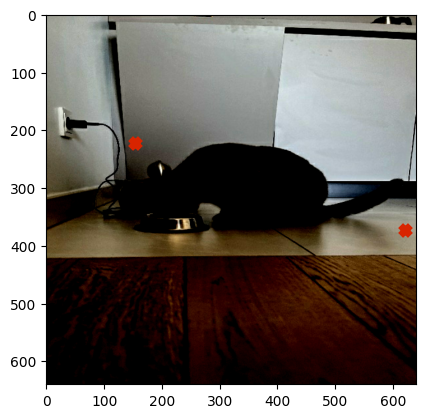

In [16]:
img = features['image'][0,:,:,:]
img_height = img.shape[0]
img_width = img.shape[1]

colours = keypoint_def["Hex colour"].values.tolist()
colours = ["#" + colour for colour in colours]
plt.imshow(img)
colours = keypoint_def["Hex colour"].values.tolist()
colours = ["#" + colour for colour in colours]
plt.imshow(img)
box = labels['groundtruth_boxes'][0,0,:]
x = float(box[0]) * img_width
y = float(box[1]) * img_height
x1 = float(box[2]) * img_width
y1 = float(box[3]) * img_height
idx = 0
plt.scatter(
    [y], [x], c=colours[idx], marker="x", s=50, linewidths=5
)
plt.scatter(
    [y1], [x1], c=colours[idx], marker="x", s=50, linewidths=5
)